# Исследование объявлений о продаже квартир

В вашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных:

- *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)
- *balcony* — число балконов
- *ceiling_height* — высота потолков (м)
- *cityCenters_nearest* — расстояние до центра города (м)
- *days_exposition* — сколько дней было размещено объявление (от публикации до снятия)
- *first_day_exposition* — дата публикации
- *floor* — этаж
- *floors_total* — всего этажей в доме
- *is_apartment* — апартаменты (булев тип)
- *kitchen_area* — площадь кухни в квадратных метрах (м²)
- *last_price* — цена на момент снятия с публикации
- *living_area* — жилая площадь в квадратных метрах(м²)
- *locality_name* — название населённого пункта
- *open_plan* — свободная планировка (булев тип)
- *parks_around3000* — число парков в радиусе 3 км
- *parks_nearest* — расстояние до ближайшего парка (м)
- *ponds_around3000* — число водоёмов в радиусе 3 км
- *ponds_nearest* — расстояние до ближайшего водоёма (м)
- *rooms* — число комнат
- *studio* — квартира-студия (булев тип)
- *total_area* — площадь квартиры в квадратных метрах (м²)
- *total_images* — число фотографий квартиры в объявлении

### Шаг 1. Файл с данными. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
apartments = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
apartments

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [2]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

В наборе данных во многих столбцах встречаются пропуски. Лидеры по количеству пропусков is_apartment, parks_nearest и ponds_nearest. Скорее всего в большенстве случаев поле is_apartment не заполнялось, если помещение не являлось апартаментами, точно также и для parks_nearest и ponds_nearest, если поблизости отсутствует парк или водоем, то расстояние в соответствующих столбцах пропущено. А вот проуски в столбце ceiling_height случайны, автор объявления не всегда знал высоту потолков в квартире, либо просто пропускал это поле. Некоторые столбцы стоит преобразовать из вещественного в целочисленный тип, например, floors_total и balcony. В столбце first_day_exposition следует превести дату к более читабельному виду убрав время, которое нам не нужно.

### Шаг 2. Предобработка данных

Начнем с лидера по количеству пропусков - столбца is_apartment. Апартаменты редкое явление для продаж квартир и вообще это не жилье, поэтому все объявления с пустыми значениями в этом столбце скорее всего не апартаменты. Заменим NaN на значения False. 

In [3]:
apartments['is_apartment'] = apartments['is_apartment'].fillna(False)

Если в радиусе 3 км от квартиры нет ни одного парка (водоема), то соответствующее значение в столбце parks_nearest (ponds_nearest) будет пустым. Поэтому значения NaN в parks_nearest и ponds_nearest оставляем, а в столбцах parks_around3000 и ponds_around3000 приравниваем к 0.

In [4]:
apartments['parks_around3000'] = apartments['parks_around3000'].fillna(0)
apartments['ponds_around3000'] = apartments['ponds_around3000'].fillna(0)

Аналогично пустое зачение в столбце balcony означает отсутствие балкона в квартире.

In [5]:
apartments['balcony'] = apartments['balcony'].fillna(0)

Пропущенные значения в days_exposition могут означать, что квартира еще не была продана. А вот в locality_name и floors_total пустые значения ничем не заменить, но их незначительное количество и от таких строк можно избавиться.

In [6]:
apartments.dropna(subset=['locality_name', 'floors_total'], inplace=True)

Чтобы избавиться от пропусков в столбцах living_area и kitchen_area посчитаем среднее отношение соответствующих площадей ко всей площади квартиры.

In [7]:
ratio_living = (apartments['living_area'] / apartments['total_area']).mean() #среднее отношение жилой площади ко всей площади квартиры
apartments['living_area'] = apartments['living_area'].fillna(apartments['total_area'] * ratio_living) # заменяем пустые значения
apartments

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.600000,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.300000,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,89.825011,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.300000,3,False,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.000000,4,False,...,8.50,0.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.700000,1,False,...,NaN,0.0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,43.358928,12,False,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [8]:
#аналогично для площади кухни
ratio_kitchen = (apartments['kitchen_area'] / apartments['total_area']).mean()
apartments['kitchen_area'] = apartments['kitchen_area'].fillna(apartments['total_area'] * ratio_kitchen)

Пропущенные значения в airports_nearest оставим без изменений, скорее всего аэропорт находится слишком далеко или просто значение не известно. Точно также и для cityCenters_nearest.  
Высота потолков в 4-5 метров бывает только во дворцах, а ниже 2 - в казематах, в квартирах обычно от 2.5 до 3 м в +/- эпсилон окрестности. Заменим неизвестные высоты потолков на среднее значение.

In [9]:
name_to_height = apartments.groupby('locality_name')['ceiling_height'].median().to_dict() # словарь с медианным значением высоты потолков для каждого населенного пункта
apartments['ceiling_height'].fillna(-1, inplace=True) # заменяем неизвестные значения высоты потолков на -1

# функция проверяет значения столбца ceiling_height, если значение пустое (равно -1), то возвращает медианное значение
#соответствующего населенного пункта, в противном случае возвращает известное значение
def mapper(row):
    if row['ceiling_height'] == -1:
        return name_to_height[row['locality_name']]
    return row['ceiling_height']

apartments['ceiling_height'] = apartments.apply(mapper, axis=1)
apartments

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.700,16.0,51.000000,8,False,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.615,11.0,18.600000,1,False,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.700,5.0,34.300000,4,False,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.700,14.0,89.825011,9,False,...,29.786996,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.030,14.0,32.000000,13,False,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.700,5.0,73.300000,3,False,...,13.830000,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.500,5.0,38.000000,4,False,...,8.500000,0.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.700000,1,False,...,10.622155,0.0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.000,17.0,43.358928,12,False,...,23.300000,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [10]:
apartments.query('ceiling_height == -1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Пустых значений в столбце ceiling_height не осталось. збс)

Преобразуем last_price, floors_total, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition в тип int.

In [11]:
to_int = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']
for i in to_int:
    
    apartments[i] = apartments[i].round(0).astype('Int64')
apartments

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.700,16,51.000000,8,False,...,25.000000,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN
1,7,3350000,40.40,2018-12-04T00:00:00,1,2.615,11,18.600000,1,False,...,11.000000,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81
2,10,5196000,56.00,2015-08-20T00:00:00,2,2.700,5,34.300000,4,False,...,8.300000,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.00,2015-07-24T00:00:00,3,2.700,14,89.825011,9,False,...,29.786996,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.030,14,32.000000,13,False,...,41.000000,0,Санкт-Петербург,31856,8098,2,112,1,48,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21T00:00:00,3,3.700,5,73.300000,3,False,...,13.830000,0,Санкт-Петербург,24665,4232,1,796,3,381,NaN
23695,14,3100000,59.00,2018-01-15T00:00:00,3,2.500,5,38.000000,4,False,...,8.500000,0,Тосно,NaN,NaN,0,NaN,0,NaN,45
23696,18,2500000,56.70,2018-02-11T00:00:00,2,NaN,3,29.700000,1,False,...,10.622155,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23697,13,11475000,76.75,2017-03-28T00:00:00,2,3.000,17,43.358928,12,False,...,23.300000,2,Санкт-Петербург,39140,10364,2,173,3,196,602


Сдедующим шагом надо все столбцы типа float, где более двух знаков после запятой, округлить до двух знаков.

In [12]:
apartments['ceiling_height'] = apartments['ceiling_height'].round(2)
apartments['living_area'] = apartments['living_area'].round(2)
apartments['kitchen_area'] = apartments['kitchen_area'].round(2)

И последнее, предтавим дату в first_day_exposition в нормальном виде.

In [13]:
apartments['first_day_exposition'] = pd.to_datetime(apartments['first_day_exposition'], format='%Y-%m-%d')
apartments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null Int64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23445 non-null float64
floors_total            23565 non-null Int64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null Int64
locality_name           23565 non-null object
airports_nearest        18041 non-null Int64
cityCenters_nearest     18064 non-null Int64
parks_around3000        23565 non-null Int64
parks_nearest           8030 non-null Int64
ponds_around3000      

### Вывод

- пропуски обработаны;
- вещественные столбцы с целочисленными значениями переведены в тип int, также произведено округление слишком длинных столбцов типа float до 2 знаков после запятой;
- дата в first_day_exposition представлена в читабельном виде.

### Шаг 3. Новые столбцы

In [14]:
#цена за квадратный метр
apartments['price_per_sqm'] = (apartments['last_price'] / apartments['total_area']).round(0).astype('int') 
apartments

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN,120370
1,7,3350000,40.40,2018-12-04,1,2.62,11,18.60,1,False,...,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81,82921
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.30,4,False,...,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92786
3,0,64900000,159.00,2015-07-24,3,2.70,14,89.83,9,False,...,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,0,Санкт-Петербург,24665,4232,1,796,3,381,NaN,72491
23695,14,3100000,59.00,2018-01-15,3,2.50,5,38.00,4,False,...,0,Тосно,NaN,NaN,0,NaN,0,NaN,45,52542
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.70,1,False,...,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN,44092
23697,13,11475000,76.75,2017-03-28,2,3.00,17,43.36,12,False,...,2,Санкт-Петербург,39140,10364,2,173,3,196,602,149511


In [15]:
apartments['weekday'] = apartments['first_day_exposition'].dt.weekday #день недели публикации объявления
apartments['month'] = apartments['first_day_exposition'].dt.month #месяц публикации объявления
apartments['year'] = apartments['first_day_exposition'].dt.year # год публикации объявления

In [16]:
#функция оперделяет этаж квартиры
def ap_floor(data):
    if data['floor'] == 1:
        return 'первый'
    elif data['floor'] == data['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
apartments['fl_floor'] = apartments.apply(ap_floor, axis=1)    
apartments

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday,month,year,fl_floor
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,1,482,2,755,NaN,120370,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.62,11,18.60,1,False,...,0,NaN,0,NaN,81,82921,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.30,4,False,...,1,90,2,574,558,92786,3,8,2015,другой
3,0,64900000,159.00,2015-07-24,3,2.70,14,89.83,9,False,...,2,84,3,234,424,408176,4,7,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,2,112,1,48,121,100000,1,6,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,1,796,3,381,NaN,72491,1,3,2017,другой
23695,14,3100000,59.00,2018-01-15,3,2.50,5,38.00,4,False,...,0,NaN,0,NaN,45,52542,0,1,2018,другой
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.70,1,False,...,0,NaN,0,NaN,NaN,44092,6,2,2018,первый
23697,13,11475000,76.75,2017-03-28,2,3.00,17,43.36,12,False,...,2,173,3,196,602,149511,1,3,2017,другой


In [17]:
apartments['ratio_living'] = (apartments['living_area'] / apartments['total_area']).round(2) #отношение жилой к общей площади
apartments['ratio_kitchen'] = (apartments['kitchen_area'] / apartments['total_area']).round(2) #отношение площади кухни к общей

### Вывод

- посчитана цена за квадратный метр для каждой квартиры;
- добавлены столбцы: день недели, месяц и год публикации объявления;
- этажи квартиры разбиты на три категории: первый, последний и другой;
- посчитаны отношения жилой площади и площади кухни к общей.

### Шаг 4. Исследовательский анализ данных

In [18]:
apartments2 = apartments.loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height']]

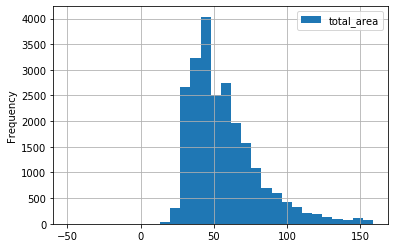

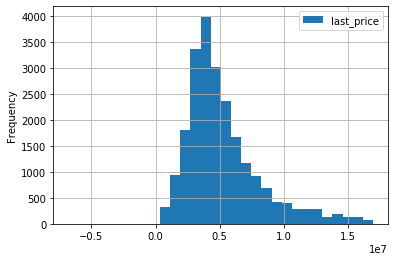

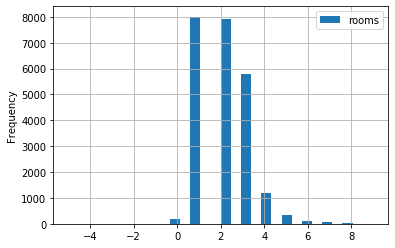

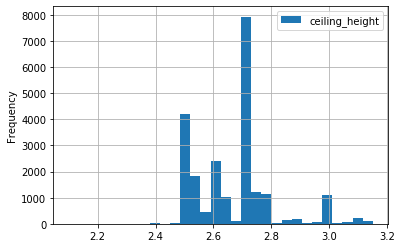

In [19]:
for_hist = ['total_area', 'last_price', 'rooms', 'ceiling_height']

# Функция находит первый и третий квартили для передаваемого столбца и считает межквартильный размах
def iqr(series):
    Q1 = series.describe()['25%']
    Q3 = series.describe()['75%']
    IQR = Q3 - Q1
    min_value = Q1 - 3 * IQR
    max_value = Q3 + 3 * IQR
    return min_value, max_value

#гистограммы для величин: площадь квартиры, цена, число комнат, высота потолков
for column in for_hist:
    apartments.plot(kind='hist', y=column, bins=30, range=(iqr(apartments[column])),grid=True, legend=True)
    plt.show()

In [20]:
apartments['ceiling_height'].describe() #изучим отдельно высоту потолков

count    23445.000000
mean         2.733959
std          1.014782
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [21]:
apartments['rooms'].describe() #и число комнат

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

В столбец ceiling_height попали явно некорректные значения, высота потолков 100 метров - это что-то нереальное, как и высота в 1 м. Нереально также количество комнат = 0. А вот разброс значений цены и площади вполне нормальный.

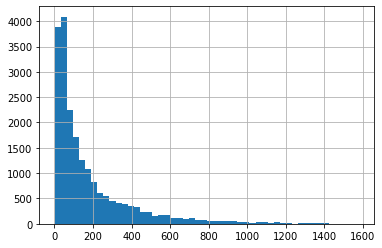

In [22]:
apartments['days_exposition'].hist(bins=50)

Распределение похоже на пуассоновское с длинным хвостом

In [23]:
#среднее время продажи квартиры
apartments['days_exposition'].mean() 

180.7413945278023

In [24]:
#медиана
apartments['days_exposition'].median() 

95.0

Почти в два раза меньше среднего времени, что говорит о длинном хвосте в сторону больших величин.

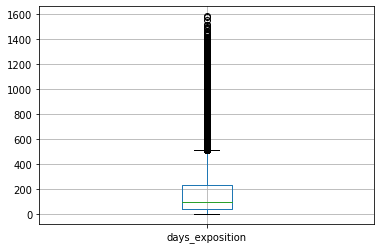

In [25]:
#ящик с усами для времени продажи квартиры
apartments.boxplot(column='days_exposition') 

Продажа квартиры дело не быстрое, будем считать обычное время продажи от медианы до третьего квартиля, ниже медианы очень быстрые продажи, выше третьего квартиля - необычно долгие.

Создадим новую data, в которой не будет квартир с необычно маленькой высотой потолков (<2 м) и слишком высокой (>3.5 м), а также квартир с нулевым количеством комнат. В добавок уберем апартаменты, т.к. в проекте рассматриваем квартиры.

In [26]:
data_new = apartments.query('2 < ceiling_height < 3.5 and rooms != 0 and is_apartment == False')
data_new

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday,month,year,fl_floor,ratio_living,ratio_kitchen
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755,NaN,120370,3,3,2019,другой,0.47,0.23
1,7,3350000,40.40,2018-12-04,1,2.62,11,18.60,1,False,...,0,NaN,81,82921,1,12,2018,первый,0.46,0.27
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.30,4,False,...,2,574,558,92786,3,8,2015,другой,0.61,0.15
3,0,64900000,159.00,2015-07-24,3,2.70,14,89.83,9,False,...,3,234,424,408176,4,7,2015,другой,0.56,0.19
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48,121,100000,1,6,2018,другой,0.32,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000,30.00,2017-07-07,1,2.60,5,17.50,4,False,...,0,NaN,413,45000,4,7,2017,другой,0.58,0.20
23693,9,4600000,62.40,2016-08-05,3,2.60,9,40.00,8,False,...,1,675,239,73718,4,8,2016,другой,0.64,0.13
23695,14,3100000,59.00,2018-01-15,3,2.50,5,38.00,4,False,...,0,NaN,45,52542,0,1,2018,другой,0.64,0.14
23697,13,11475000,76.75,2017-03-28,2,3.00,17,43.36,12,False,...,3,196,602,149511,1,3,2017,другой,0.56,0.30


In [27]:
data_new['ceiling_height'].describe()

count    22753.000000
mean         2.684334
std          0.170663
min          2.200000
25%          2.550000
50%          2.700000
75%          2.700000
max          3.490000
Name: ceiling_height, dtype: float64

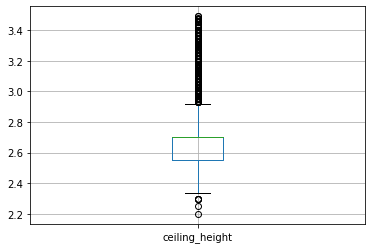

In [28]:
data_new.boxplot(column=['ceiling_height'])

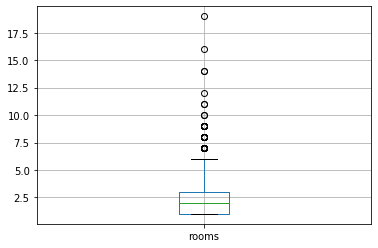

In [29]:
data_new.boxplot(column=['rooms'])

По диаграмме видно, что большенство квартир 1-3-х комнатные, медиана равна 2 комнатам. Уберем уберем квартиры с количеством комнат > 10, так как их единицы, но они могут исказить статистику.

In [30]:
data_new = data_new.query('rooms <= 10')

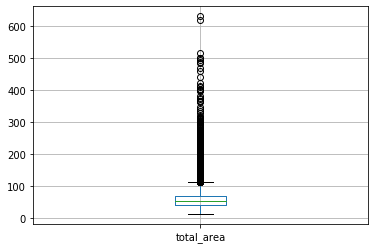

In [31]:
data_new.boxplot(column=['total_area'])

Также избавимся от квартир площадью > 300 кв. метров.

In [32]:
data_new = data_new.query('total_area <= 300')

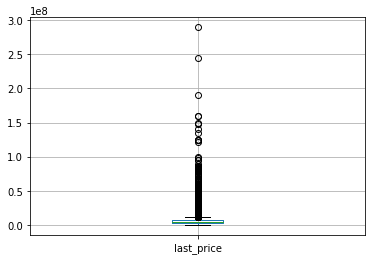

In [33]:
data_new.boxplot(column=['last_price'])

Отрежим строки с ценой > 0.5 * 10^8.

In [34]:
data_new = data_new.query('last_price <= 50000000')

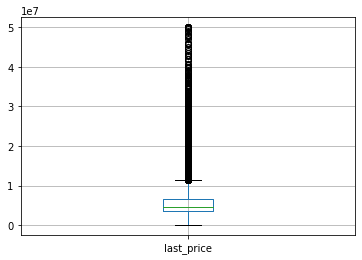

In [35]:
data_new.boxplot(column=['last_price'])

Пожалуй, стоит еще порезать. Уберем строки с ценой больше 20 000 000.

In [36]:
data_new = data_new.query('last_price <= 20000000')

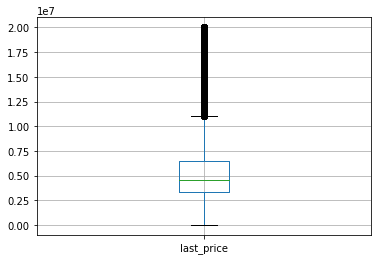

In [37]:
data_new.boxplot(column=['last_price'])

Создадим новую таблицу со столбцами last_price, total_area и rooms.

In [38]:
last_price_on_area_rooms = data_new.loc[:, ['price_per_sqm', 'total_area', 'rooms', 'cityCenters_nearest', 'locality_name']]

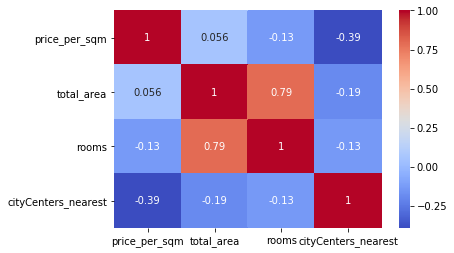

In [39]:
# Рассмотрим корреляцию выбранных столбцов
sns.heatmap(last_price_on_area_rooms.corr(), annot=True, cmap='coolwarm')

Наблюдается корреляция между ценой и расстоянием до центра, все логично, чем ближе к центру, тем дороже.  
Корреляция между ценой и площадью квартиры, а также ценой и количеством комнат не выявлена. Это объясняется тем, что на корреляцию влияет множество факторов: расстояние до центра, высота потолков, планировка, также в Санкт-Петербурге квартиры стоят дороже, чем в соседних населенных пунктах, и звисимость может быть нелинейной.

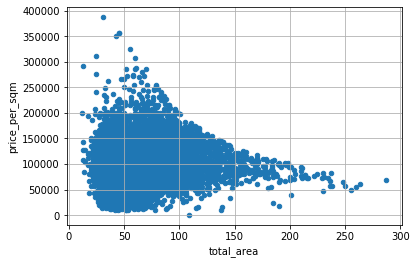

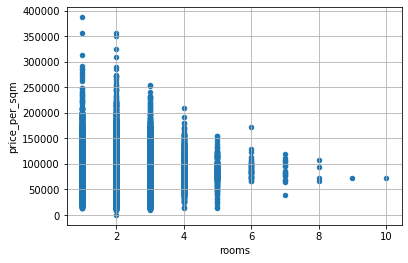

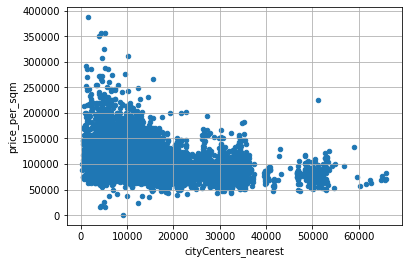

In [40]:
on_aromCent = ['total_area', 'rooms', 'cityCenters_nearest']
#Построим графики зависимости цены от площади, числа комнат и расстояния до центра
for column in on_aromCent:
    last_price_on_area_rooms.sort_values(column).plot(x=column, y='price_per_sqm', kind='scatter', grid=True)
    plt.show()

Слишком большой разброс на малых величинах, нельзя сделать однозначный вывод.

In [41]:
#построим сводку средней цены и медианы от этажа квартиры
data_new.pivot_table(index='fl_floor', values='price_per_sqm', aggfunc=['mean', 'median']) 

,mean,median
,price_per_sqm,price_per_sqm
fl_floor,,
другой,98737.288311,97239.5
первый,80312.556200,81011.0
последний,86633.201115,86250.0


Самые дешевые квартиры на первом этаже, но и последние тоже не в моде.

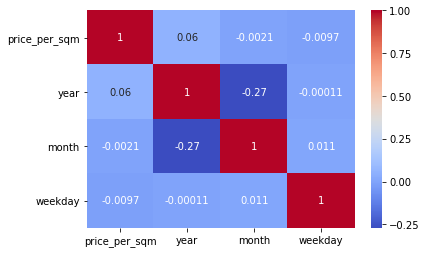

In [42]:
#рассчитаем коэффициент корреляции между площадью и датой размещения объявления
on_date = data_new.loc[:, ['price_per_sqm', 'year', 'month', 'weekday']]
sns.heatmap(on_date.corr(), annot=True, cmap='coolwarm')

Корреляции между ценой и датой публикации объявления не обнаружены, построим графики.

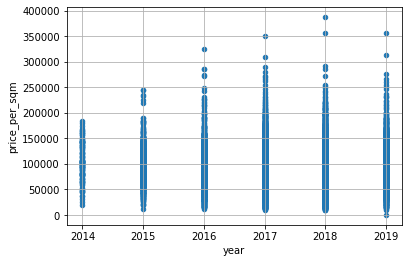

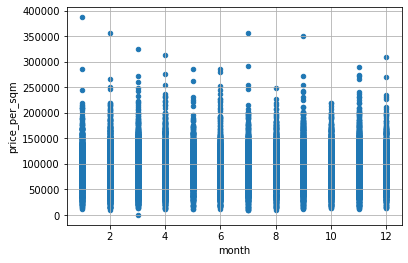

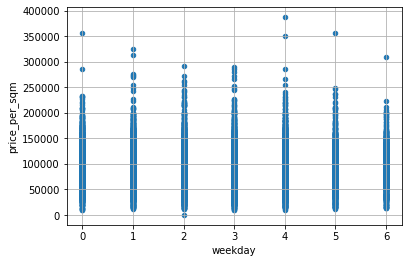

In [43]:
on_aromCent = ['year', 'month', 'weekday']

for column in on_aromCent:
    on_date.sort_values(column).plot(x=column, y='price_per_sqm', kind='scatter', grid=True)
    plt.show()

В общем и целом четкой зависимости цены квартиры от месяца и дня недели размещения объявления не прослеживается. Наблюдается увеличение стоимости к 2018 году.

In [44]:
#Средняя цена кв. м по населенным пунктам.
pivot_price_on_locality = data_new.pivot_table(index='locality_name', values='price_per_sqm', aggfunc=['count', 'mean'])
pivot_price_on_locality.columns = ['count', 'price_per_sqm_mean']
pivot_price_on_locality['price_per_sqm_mean'] = pivot_price_on_locality['price_per_sqm_mean'].round(0).astype('int')
pivot_price_on_locality

,count,price_per_sqm_mean
locality_name,,
Бокситогорск,1,19231
Волосово,36,40183
Волхов,110,35055
Всеволожск,386,67140
Выборг,225,57806
...,...,...
садовое товарищество Рахья,1,37778
село Копорье,5,46052
село Павлово,7,61893


In [45]:
#10 населенных пунктов с наибольшим количеством объявлений
pivot_price_on_locality.sort_values(by='count', ascending=False).head(10) 

,count,price_per_sqm_mean
locality_name,,
Санкт-Петербург,14537,108318
посёлок Мурино,493,85076
посёлок Шушары,434,78255
Всеволожск,386,67140
Пушкин,353,101829
Колпино,336,75185
посёлок Парголово,323,90290
Гатчина,305,68811
деревня Кудрово,283,92297


Самая низкая цена из топ 10 в Выборге (57973 руб за кв м), самая высокая, как и ожидалось в Санкт-Петербурге (113760), на втором месте Пушкин (102555).

In [46]:
#таблица для Санкт-Петербург, в которой исключены пустые значения расстояния от центра
SP_center_km = data_new.query('locality_name == "Санкт-Петербург"') 
SP_center_km['to_center_km'] = (SP_center_km['cityCenters_nearest'] / 1000).round(0).astype('Int64') #расстояние до центра в км
SP_center_km

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_sqm,weekday,month,year,fl_floor,ratio_living,ratio_kitchen,to_center_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,755,NaN,120370,3,3,2019,другой,0.47,0.23,16
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.30,4,False,...,574,558,92786,3,8,2015,другой,0.61,0.15,14
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,48,121,100000,1,6,2018,другой,0.32,0.41,8
7,5,7915000,71.60,2019-04-18,2,2.70,24,40.45,22,False,...,NaN,NaN,110545,3,4,2019,другой,0.56,0.26,12
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,NaN,289,88525,6,2,2017,другой,0.71,0.11,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9200000,101.00,2019-04-01,3,3.05,15,63.00,12,False,...,NaN,23,91089,0,4,2019,другой,0.62,0.15,14
23689,13,3550000,35.30,2018-02-28,1,2.86,15,16.30,4,False,...,652,29,100567,2,2,2018,другой,0.46,0.26,16
23690,3,5500000,52.00,2018-07-19,2,2.70,5,31.00,2,False,...,NaN,15,105769,3,7,2018,другой,0.60,0.12,6
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.30,7,False,...,806,519,129904,3,10,2016,другой,0.55,0.15,4


In [47]:
pivot_to_center = SP_center_km.pivot_table(index='to_center_km', values='price_per_sqm')
pivot_to_center

,price_per_sqm
to_center_km,
0,102730.375000
1,128912.658915
2,123386.057971
3,112100.515901
4,120972.475676
5,125805.750349
6,126992.679089
7,123724.810811
8,120667.351955


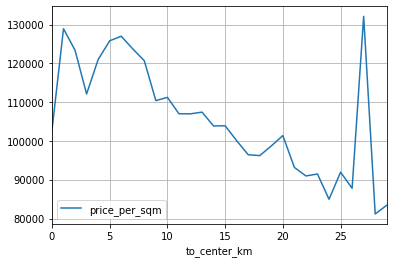

In [48]:
#график зависимости средней цены за квадратный метр от расстояния до центра в км
pivot_to_center.plot(y='price_per_sqm', grid=True) 

На графике идет резкое падение цены примерно от 1-2 до 3 км. Резкое изменение графика также наблюдается на 7 км, на 3 км ярко выражен локальный минимум. Видимо на этом расстоянии находится большое количество бомжатников, из-за чего просела цена. Радиус центра в 2 км слишком маленький для такого города, как Санкт-Петербург. Примем за центр площадь, радиуса 7 км.

In [49]:
 #сегмент квартир в центре
segment_in_center = SP_center_km[SP_center_km['to_center_km'] <= 7]
segment_in_center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_sqm,weekday,month,year,fl_floor,ratio_living,ratio_kitchen,to_center_km
24,8,6500000,97.2,2015-10-31,2,2.70,3,46.5,1,False,...,124,265,66872,5,10,2015,первый,0.48,0.20,2
35,6,15500000,149.0,2017-06-26,5,2.70,5,104.0,4,False,...,779,644,104027,0,6,2017,другой,0.70,0.11,4
52,20,11795000,136.0,2017-09-22,6,3.00,2,94.0,2,False,...,NaN,NaN,86728,4,9,2017,последний,0.69,0.08,7
61,18,7990000,74.0,2017-08-24,2,2.70,4,43.0,4,False,...,NaN,609,107973,3,8,2017,последний,0.58,0.27,4
63,2,20000000,118.0,2018-09-11,3,3.00,9,68.0,7,False,...,779,37,169492,1,9,2018,другой,0.58,0.14,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23664,5,9000000,110.0,2015-12-10,4,3.36,7,64.6,5,False,...,118,816,81818,3,12,2015,другой,0.59,0.14,5
23665,11,4250000,47.0,2016-05-20,1,2.70,6,18.2,1,False,...,519,131,90426,4,5,2016,первый,0.39,0.31,5
23681,13,5250000,43.0,2018-05-11,2,2.50,5,29.0,2,False,...,660,80,122093,4,5,2018,другой,0.67,0.14,7
23690,3,5500000,52.0,2018-07-19,2,2.70,5,31.0,2,False,...,NaN,15,105769,3,7,2018,другой,0.60,0.12,6


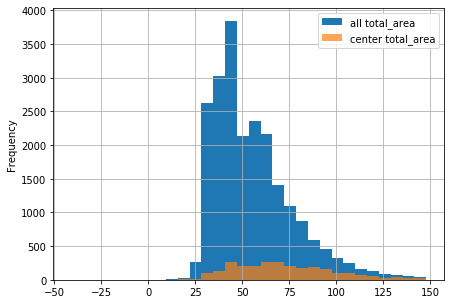

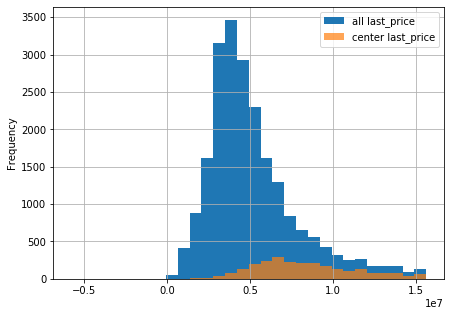

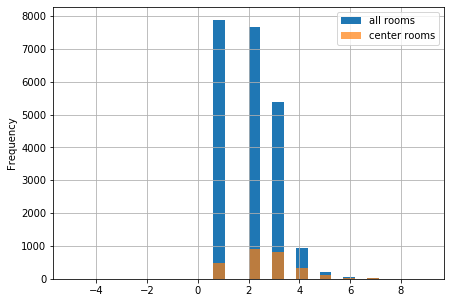

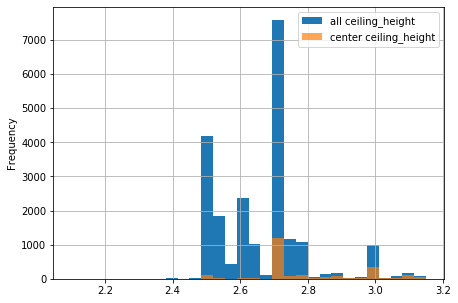

In [50]:
for_hist_new = ['total_area', 'last_price', 'rooms', 'ceiling_height']

for column in for_hist_new:
    ax = data_new.plot(kind='hist', y=column, bins=30, range=(iqr(data_new[column])), grid=True, legend=True, label='all ' +column)
    segment_in_center.plot(kind='hist', y=column, bins=30, ax=ax, range=(iqr(data_new[column])), grid=True, legend=True, alpha=0.7, label='center ' +column, figsize=(7,5))
    plt.show()

В целом схожие зависимости. Однако в центре распределение цен смещено вправо, что согласуется с прошлыми выводами, что ближе к центру квартиры стоят дороже. Также вместо однокомнатных преобладают двух и трехкомнатные квартиры.

In [58]:
last_price_on_area_rooms_SP_center = segment_in_center.loc[:, ['price_per_sqm', 'last_price', 'total_area', 'rooms', 'cityCenters_nearest', 'locality_name']]

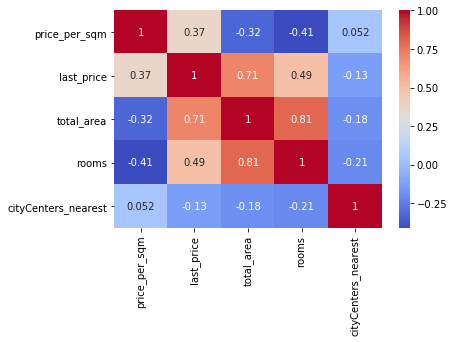

In [59]:
sns.heatmap(last_price_on_area_rooms_SP_center.corr(), annot=True, cmap='coolwarm')

Корреляции между ценой и расстоянием от центра нет, что логично, ведь квартиры и так в центре находятся. Более интересные зависимости получаются от площади и числа комнат. В целом цена квартиры в зависимости от увеличения площади и числа комнат растет, что естественно. Однако цена за квадратные метр уменьшается, чтобы предложения казались более выгодными для покупателей.

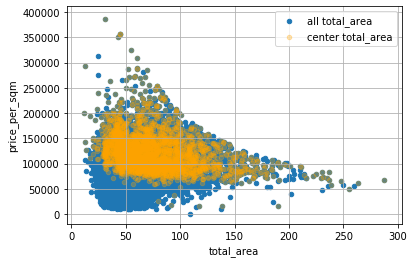

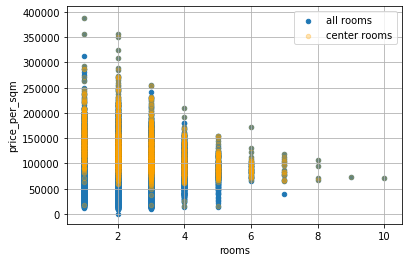

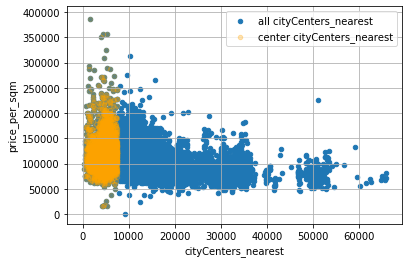

In [69]:
on_aromCentForCenter = ['total_area', 'rooms', 'cityCenters_nearest']
#Построим графики зависимости цены от площади, числа комнат и расстояния до центра
for column in on_aromCentForCenter:
    ax = last_price_on_area_rooms.sort_values(column).plot(x=column, y='price_per_sqm', kind='scatter', grid=True, label='all '+column)
    last_price_on_area_rooms_SP_center.sort_values(column).plot(x=column, y='price_per_sqm', kind='scatter', ax=ax, grid=True, legend=True, label='center '+column, alpha=0.3, color='orange')
    plt.show()

В центре цены смещены к вверх к большим значениям, особенно видно на графике зависимости от площади, что практически нет цен ниже 50000 за квадратный метр.

In [71]:
segment_in_center.pivot_table(index='fl_floor', values='price_per_sqm', aggfunc=['mean', 'median'])

,mean,median
,price_per_sqm,price_per_sqm
fl_floor,,
другой,126247.611722,121084.0
первый,112953.389571,105548.0
последний,118232.673640,110086.5


Также первый этаж самый дешевый. Но другие этажи уже более резко преобладают в цене над первым и последним.

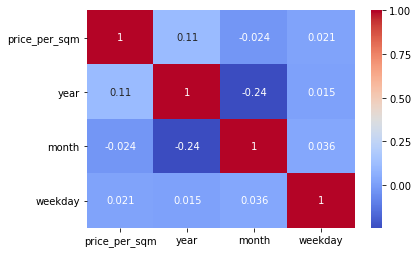

In [72]:
#рассчитаем коэффициент корреляции между площадью и датой размещения объявления
on_date_center = segment_in_center.loc[:, ['price_per_sqm', 'year', 'month', 'weekday']]
sns.heatmap(on_date_center.corr(), annot=True, cmap='coolwarm')

Корреляция цены от года для центра больше, чем по всем остальным квартирам и равна 0.11

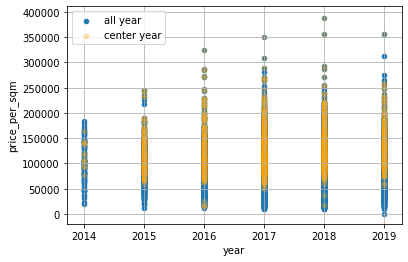

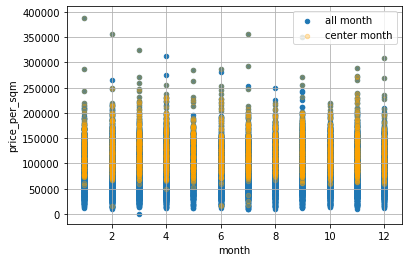

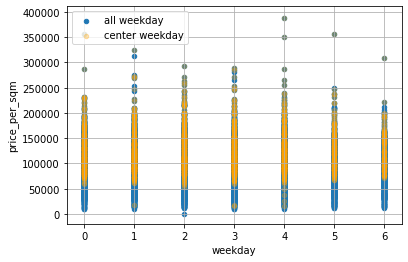

In [74]:
on_aromCent = ['year', 'month', 'weekday']

for column in on_aromCent:
    ax = on_date.sort_values(column).plot(x=column, y='price_per_sqm', kind='scatter', label='all '+column, grid=True)
    on_date_center.sort_values(column).plot(x=column, y='price_per_sqm', kind='scatter', ax=ax, label='center '+column, legend=True, alpha=0.3, grid=True, color='orange')
    plt.show()

Наблюдается возрастание цены к 2017 году.

### Вывод

- цена квартиры зависит от площади, более слабо от количества комнат и высоты потолков, а также от удаленноси от центра. В центре города наблюдаются примерно такие же зависимости, за исключением параметра удаленности от центра, в этом случае он уже не играет существенную роль, потому что все квартиры фактически находятся в центре и того факта, что стоимость квадратного метра понижается с возрастанием количества комнат и площади, чтобы предложения казались для клиентов более выгодными;
- также стоит отметить более высокие значения стоимости на графиках зивисимостей для центра, практически нет значений ниже 50000 за квадратный метр;
- определена центральня зона - площадь вокруг центра радиусом 7 км;
- в среднем квартиры продаются 180 дней, продажа прошла очень быстро, если квартира была продана меньше, чем за 95 дней, долго - больше ~ 250 дней;
- цена квартиры возрастает к 2017-2018 г, но не зависит от месяца и дня недели размещения объявления;
- на первом этаже самые дешевые квартиры, чуть дороже на последнем и самые дорогие на других этажах.

### Шаг 5. Общий вывод

- выполнена предобработка, заполнены пропуска;
- проведен исследовательский анализ стоимости квартир в наборе данных и сегмента в центре Санкт-Петербурга;
- определена центральная зона, которая составляет площадь вокруг центра радиусом 7 км;
- стоимость квартиры зависит от ее площади и удаленности от центра, в меньшей степени от количества комнат и высоты потолков. Для центрального сегмента определены схожие зависимости, с отличием от всего набора в том, что для таких квартир не выявлена зависимость стоимости от удаленности от центра, т.к. эти квартиры итак находятся в центре, а также цена за квадратный метр для центра, в отличие от остальных квартир явно уменьшается с увеличением количества комнат и возрастанием площади квариры;
- в среднем квартиры продаются около 180 дней, есть очень быстрые продажи (< 95 дней) и необычно долгие (> 250 дней);
- стоимость квартиры не зависит от даты публикации объявления;
- самые дешевые квартиры располагаются на первых этажах дома (81011 и 105548 в среднем цена за квадратный метр для всех и для центра соответственно), чуть дороже на последне (86250 и 110086) и самые дорогие на других этажах (97239 и 121084).